In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os
import pylab as pl
from scipy import stats
sns.set(color_codes=True)
import statistics
from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [2]:
mydata1 = pd.read_csv('bank-full.csv')

In [3]:
mydata = mydata1


In [4]:
mydata.shape


(45211, 17)

In [5]:
mydata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
mydata.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [8]:
mydata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
mydata[pd.isnull]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mydata.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [11]:
mydata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
sns.pairplot(mydata)

In [13]:
mydata['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [14]:
countNo = len(mydata[mydata.Target == 'no'])
countYes = len(mydata[mydata.Target == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(mydata.Target))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(mydata.Target))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


In [15]:
mydata.groupby('Target').mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [16]:
mydata.isnull().values.any()

False

In [17]:
mydata['Target'].unique()




array(['no', 'yes'], dtype=object)

In [18]:
mydata['Target'] = np.where(mydata['Target']== 'yes',1,0)



In [19]:
mydata['Target'] = mydata['Target'].astype(np.int64)

In [20]:
mydata.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [21]:
mydata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

In [22]:
def Categorical_Grapgh(data,catfeature,distributionName):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    sns.countplot(x = catfeature, data = mydata)
    ax.set_xlabel(catfeature, fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title(distributionName, fontsize=15)
    ax.tick_params(labelsize=15)
    sns.despine()

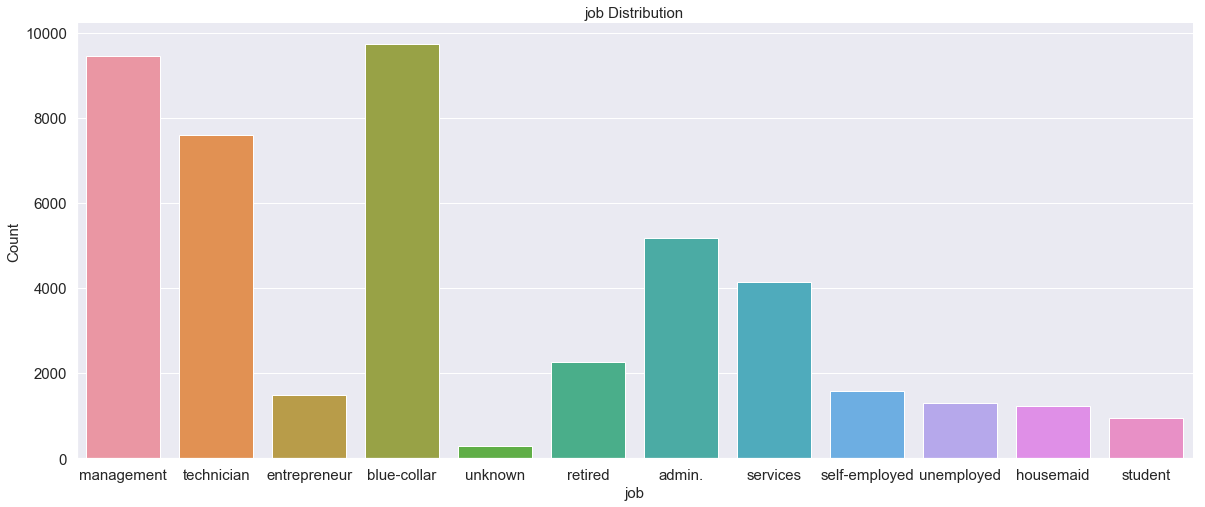

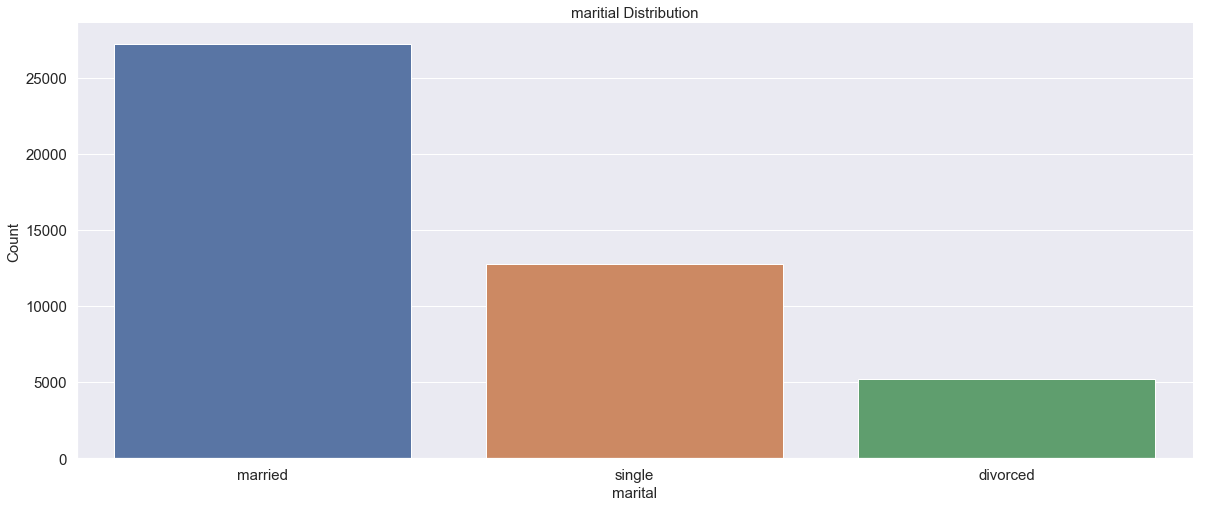

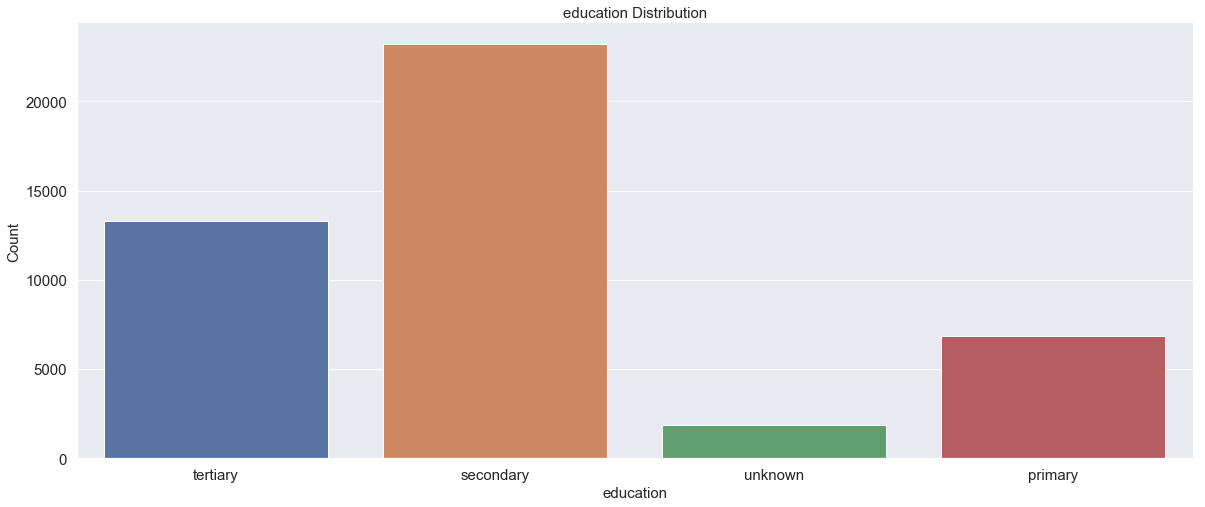

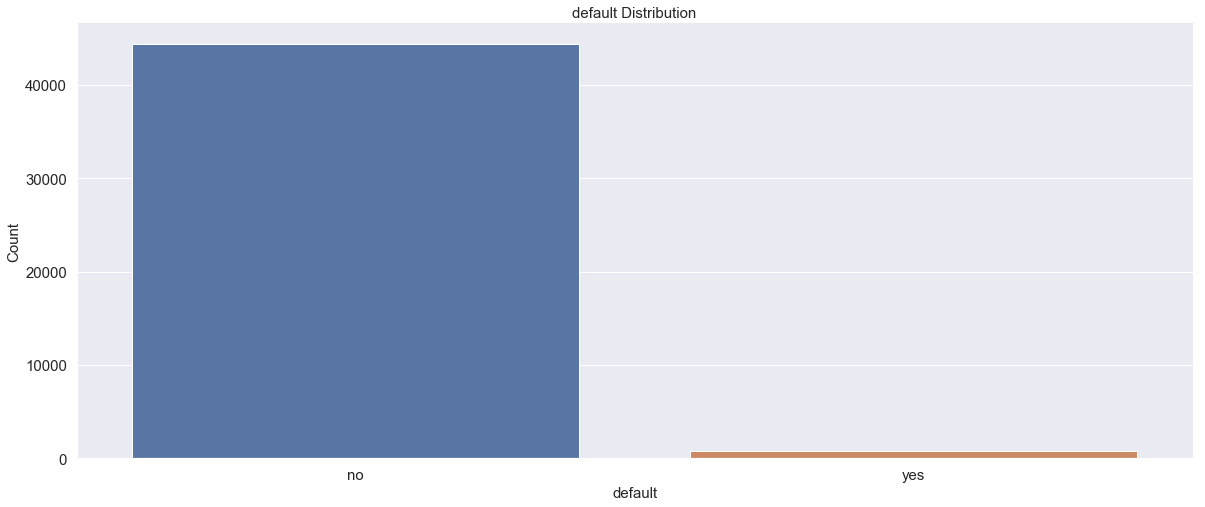

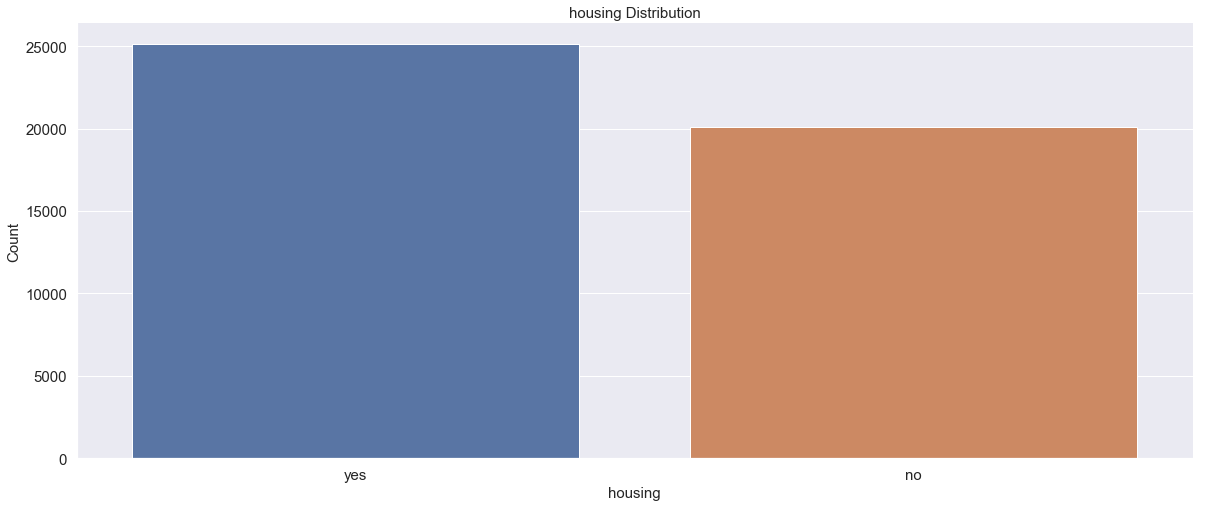

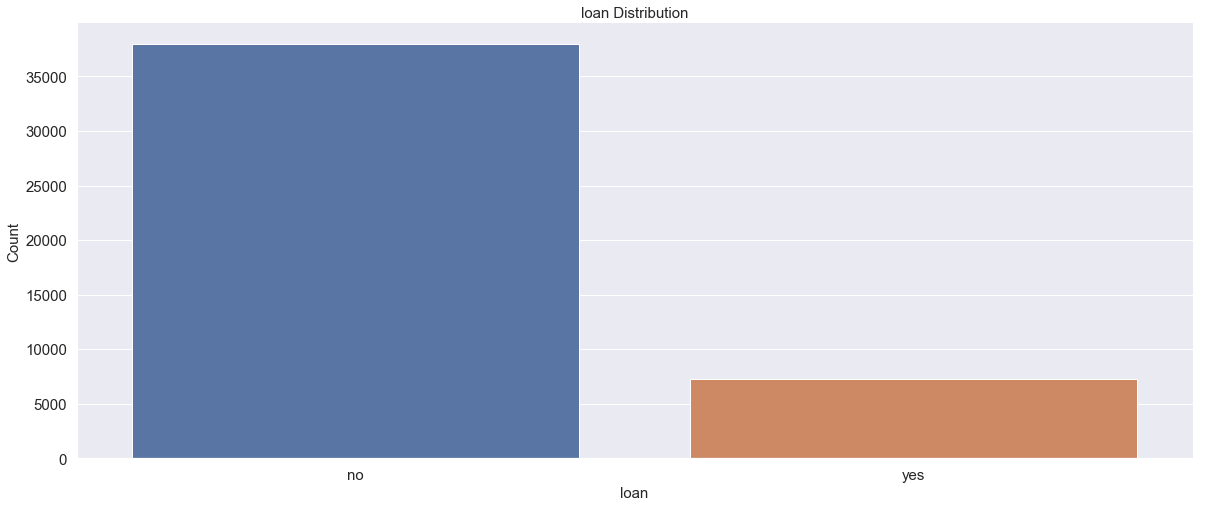

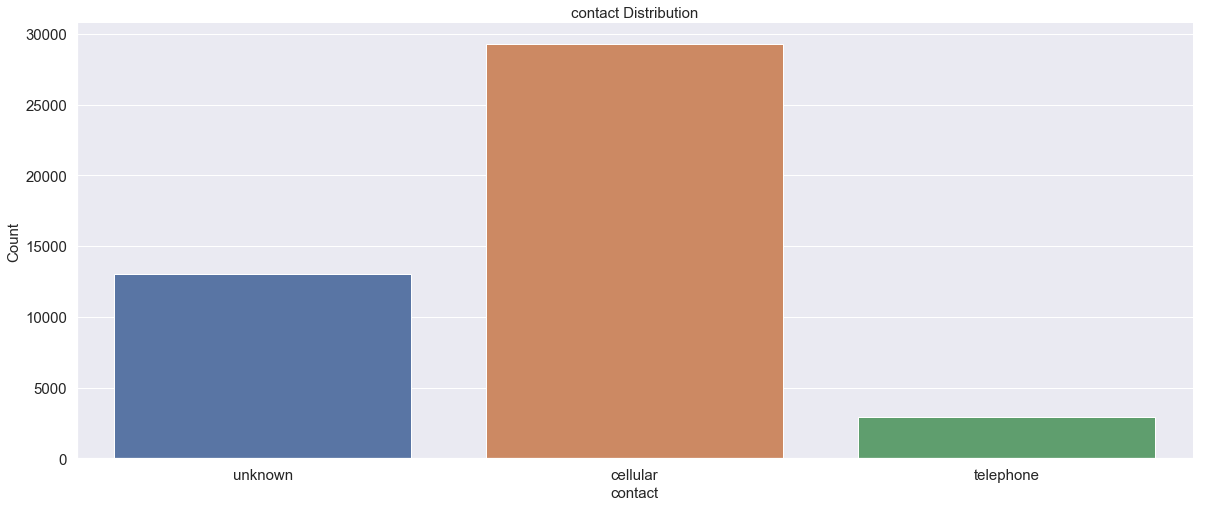

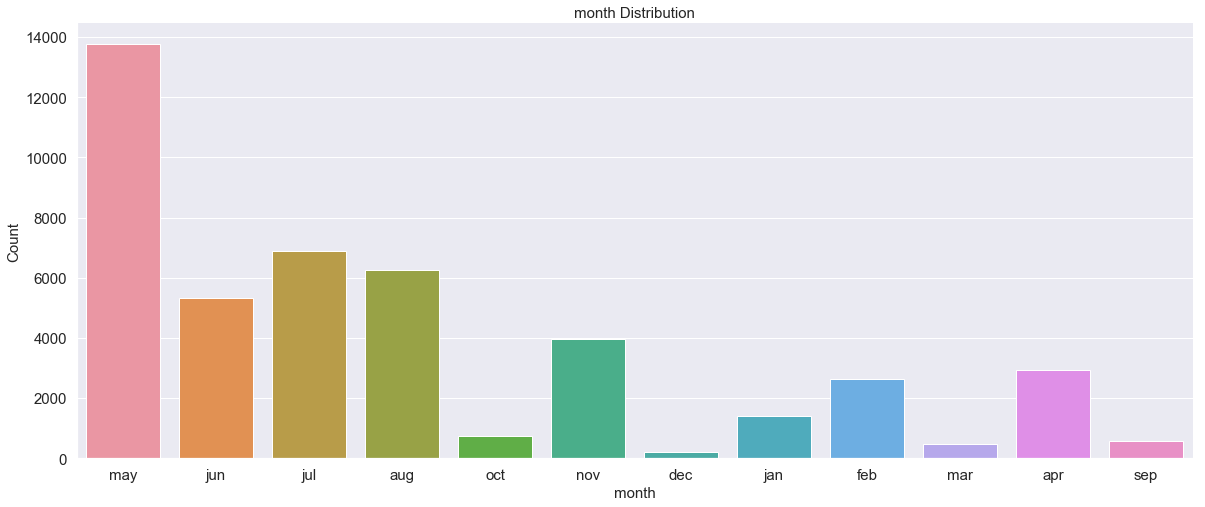

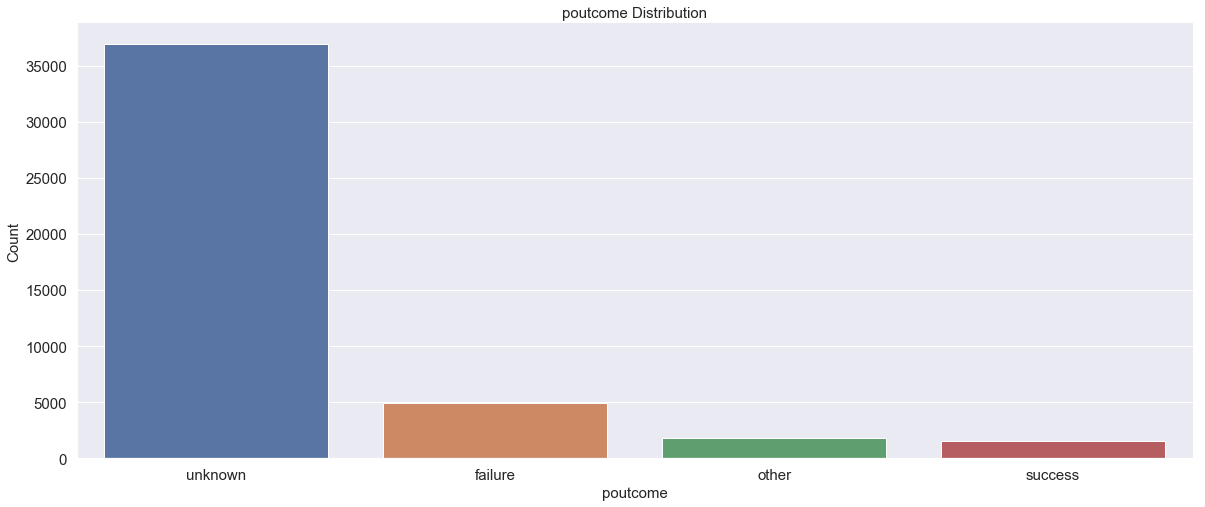

In [23]:

Categorical_Grapgh(mydata,'job','job Distribution')
Categorical_Grapgh(mydata,'marital','maritial Distribution')
Categorical_Grapgh(mydata,'education','education Distribution')
Categorical_Grapgh(mydata,'default','default Distribution')
Categorical_Grapgh(mydata,'housing','housing Distribution')
Categorical_Grapgh(mydata,'loan','loan Distribution')
Categorical_Grapgh(mydata,'contact','contact Distribution')
Categorical_Grapgh(mydata,'month','month Distribution')
Categorical_Grapgh(mydata,'poutcome','poutcome Distribution')

In [24]:
mydata.groupby(['job','Target']).Target.count()

job            Target
admin.         0         4540
               1          631
blue-collar    0         9024
               1          708
entrepreneur   0         1364
               1          123
housemaid      0         1131
               1          109
management     0         8157
               1         1301
retired        0         1748
               1          516
self-employed  0         1392
               1          187
services       0         3785
               1          369
student        0          669
               1          269
technician     0         6757
               1          840
unemployed     0         1101
               1          202
unknown        0          254
               1           34
Name: Target, dtype: int64

In [25]:
F, p = stats.f_oneway(mydata[mydata.job=='admin.'].Target,
                      mydata[mydata.job=='blue-collar'].Target,
                      mydata[mydata.job=='entrepreneur'].Target,
                      mydata[mydata.job=='housemaid'].Target,
                      mydata[mydata.job=='management'].Target,
                      mydata[mydata.job=='retired'].Target,
                      mydata[mydata.job=='self-employed'].Target,
                      mydata[mydata.job=='services'].Target,
                      mydata[mydata.job=='student'].Target,
                      mydata[mydata.job=='technician'].Target,
                      mydata[mydata.job=='unemployed'].Target
                      )
print(F)

85.17944111606913


In [26]:
mydata.groupby(['marital','Target']).Target.count()

marital   Target
divorced  0          4585
          1           622
married   0         24459
          1          2755
single    0         10878
          1          1912
Name: Target, dtype: int64

In [27]:
mydata.groupby(['job','marital','Target']).Target.count()

job           marital   Target
admin.        divorced  0          660
                        1           90
              married   0         2387
                        1          306
              single    0         1493
                        1          235
blue-collar   divorced  0          692
                        1           58
              married   0         6531
                        1          437
              single    0         1801
                        1          213
entrepreneur  divorced  0          164
                        1           15
              married   0          989
                        1           81
              single    0          211
                        1           27
housemaid     divorced  0          166
                        1           18
              married   0          845
                        1           67
              single    0          120
                        1           24
management    divorced  0        

In [28]:
mydata.groupby(['contact','Target']).Target.count()

contact    Target
cellular   0         24916
           1          4369
telephone  0          2516
           1           390
unknown    0         12490
           1           530
Name: Target, dtype: int64

In [29]:
F, p = stats.f_oneway(mydata[mydata.contact=='telephone'].Target,
                      mydata[mydata.contact=='cellular'].Target)
print(F)

4.711824692146227


In [30]:
F, p = stats.f_oneway(mydata[mydata.loan=='no'].Target,
                      mydata[mydata.loan=='yes'].Target)
print(F)

211.16739503154483


In [31]:
mydata.groupby(['loan','Target']).age.count()

loan  Target
no    0         33162
      1          4805
yes   0          6760
      1           484
Name: age, dtype: int64

In [32]:
mydata.groupby(['default','Target']).age.count()

default  Target
no       0         39159
         1          5237
yes      0           763
         1            52
Name: age, dtype: int64

In [33]:
F, p = stats.f_oneway(mydata[mydata.default=='no'].Target,
                      mydata[mydata.default=='yes'].Target)
print(F)

22.733923216953528


In [34]:
mydata.groupby(['housing','Target']).age.count()

housing  Target
no       0         16727
         1          3354
yes      0         23195
         1          1935
Name: age, dtype: int64

In [35]:
F, p = stats.f_oneway(mydata[mydata.housing=='no'].Target,
                      mydata[mydata.housing=='yes'].Target)
print(F)

892.9505764573032


In [36]:
mydata.groupby(['poutcome','Target']).age.count()

poutcome  Target
failure   0          4283
          1           618
other     0          1533
          1           307
success   0           533
          1           978
unknown   0         33573
          1          3386
Name: age, dtype: int64

In [37]:
F, p = stats.f_oneway(mydata[mydata.poutcome=='success'].Target,
                      mydata[mydata.poutcome=='failure'].Target,
                      mydata[mydata.poutcome=='other'].Target,
                      mydata[mydata.poutcome=='unknown'].Target)
print(F)

1621.1767284683388


In [38]:
mydata.groupby(['month','Target']).age.count()

month  Target
apr    0          2355
       1           577
aug    0          5559
       1           688
dec    0           114
       1           100
feb    0          2208
       1           441
jan    0          1261
       1           142
jul    0          6268
       1           627
jun    0          4795
       1           546
mar    0           229
       1           248
may    0         12841
       1           925
nov    0          3567
       1           403
oct    0           415
       1           323
sep    0           310
       1           269
Name: age, dtype: int64

In [39]:
print(mydata.job.unique())
#job  - Nominal
print(mydata.marital.unique())
#Maritial Nominal
print(mydata.education.unique())
#education - Ordinary
print(mydata.default.unique())
# seems Ordinary if we put -1 for unknown
print('housing', mydata.housing.unique())
# seems Ordinary if we put -1 for unknown
print(mydata.loan.unique())
# seems Ordinary if we put -1 for unknown
print(mydata.contact.unique())
# Nominal
print(mydata.month.unique())
#ordinal
print(mydata.poutcome.unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
housing ['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']


In [40]:
mydata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [41]:
mydata.corr()

,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


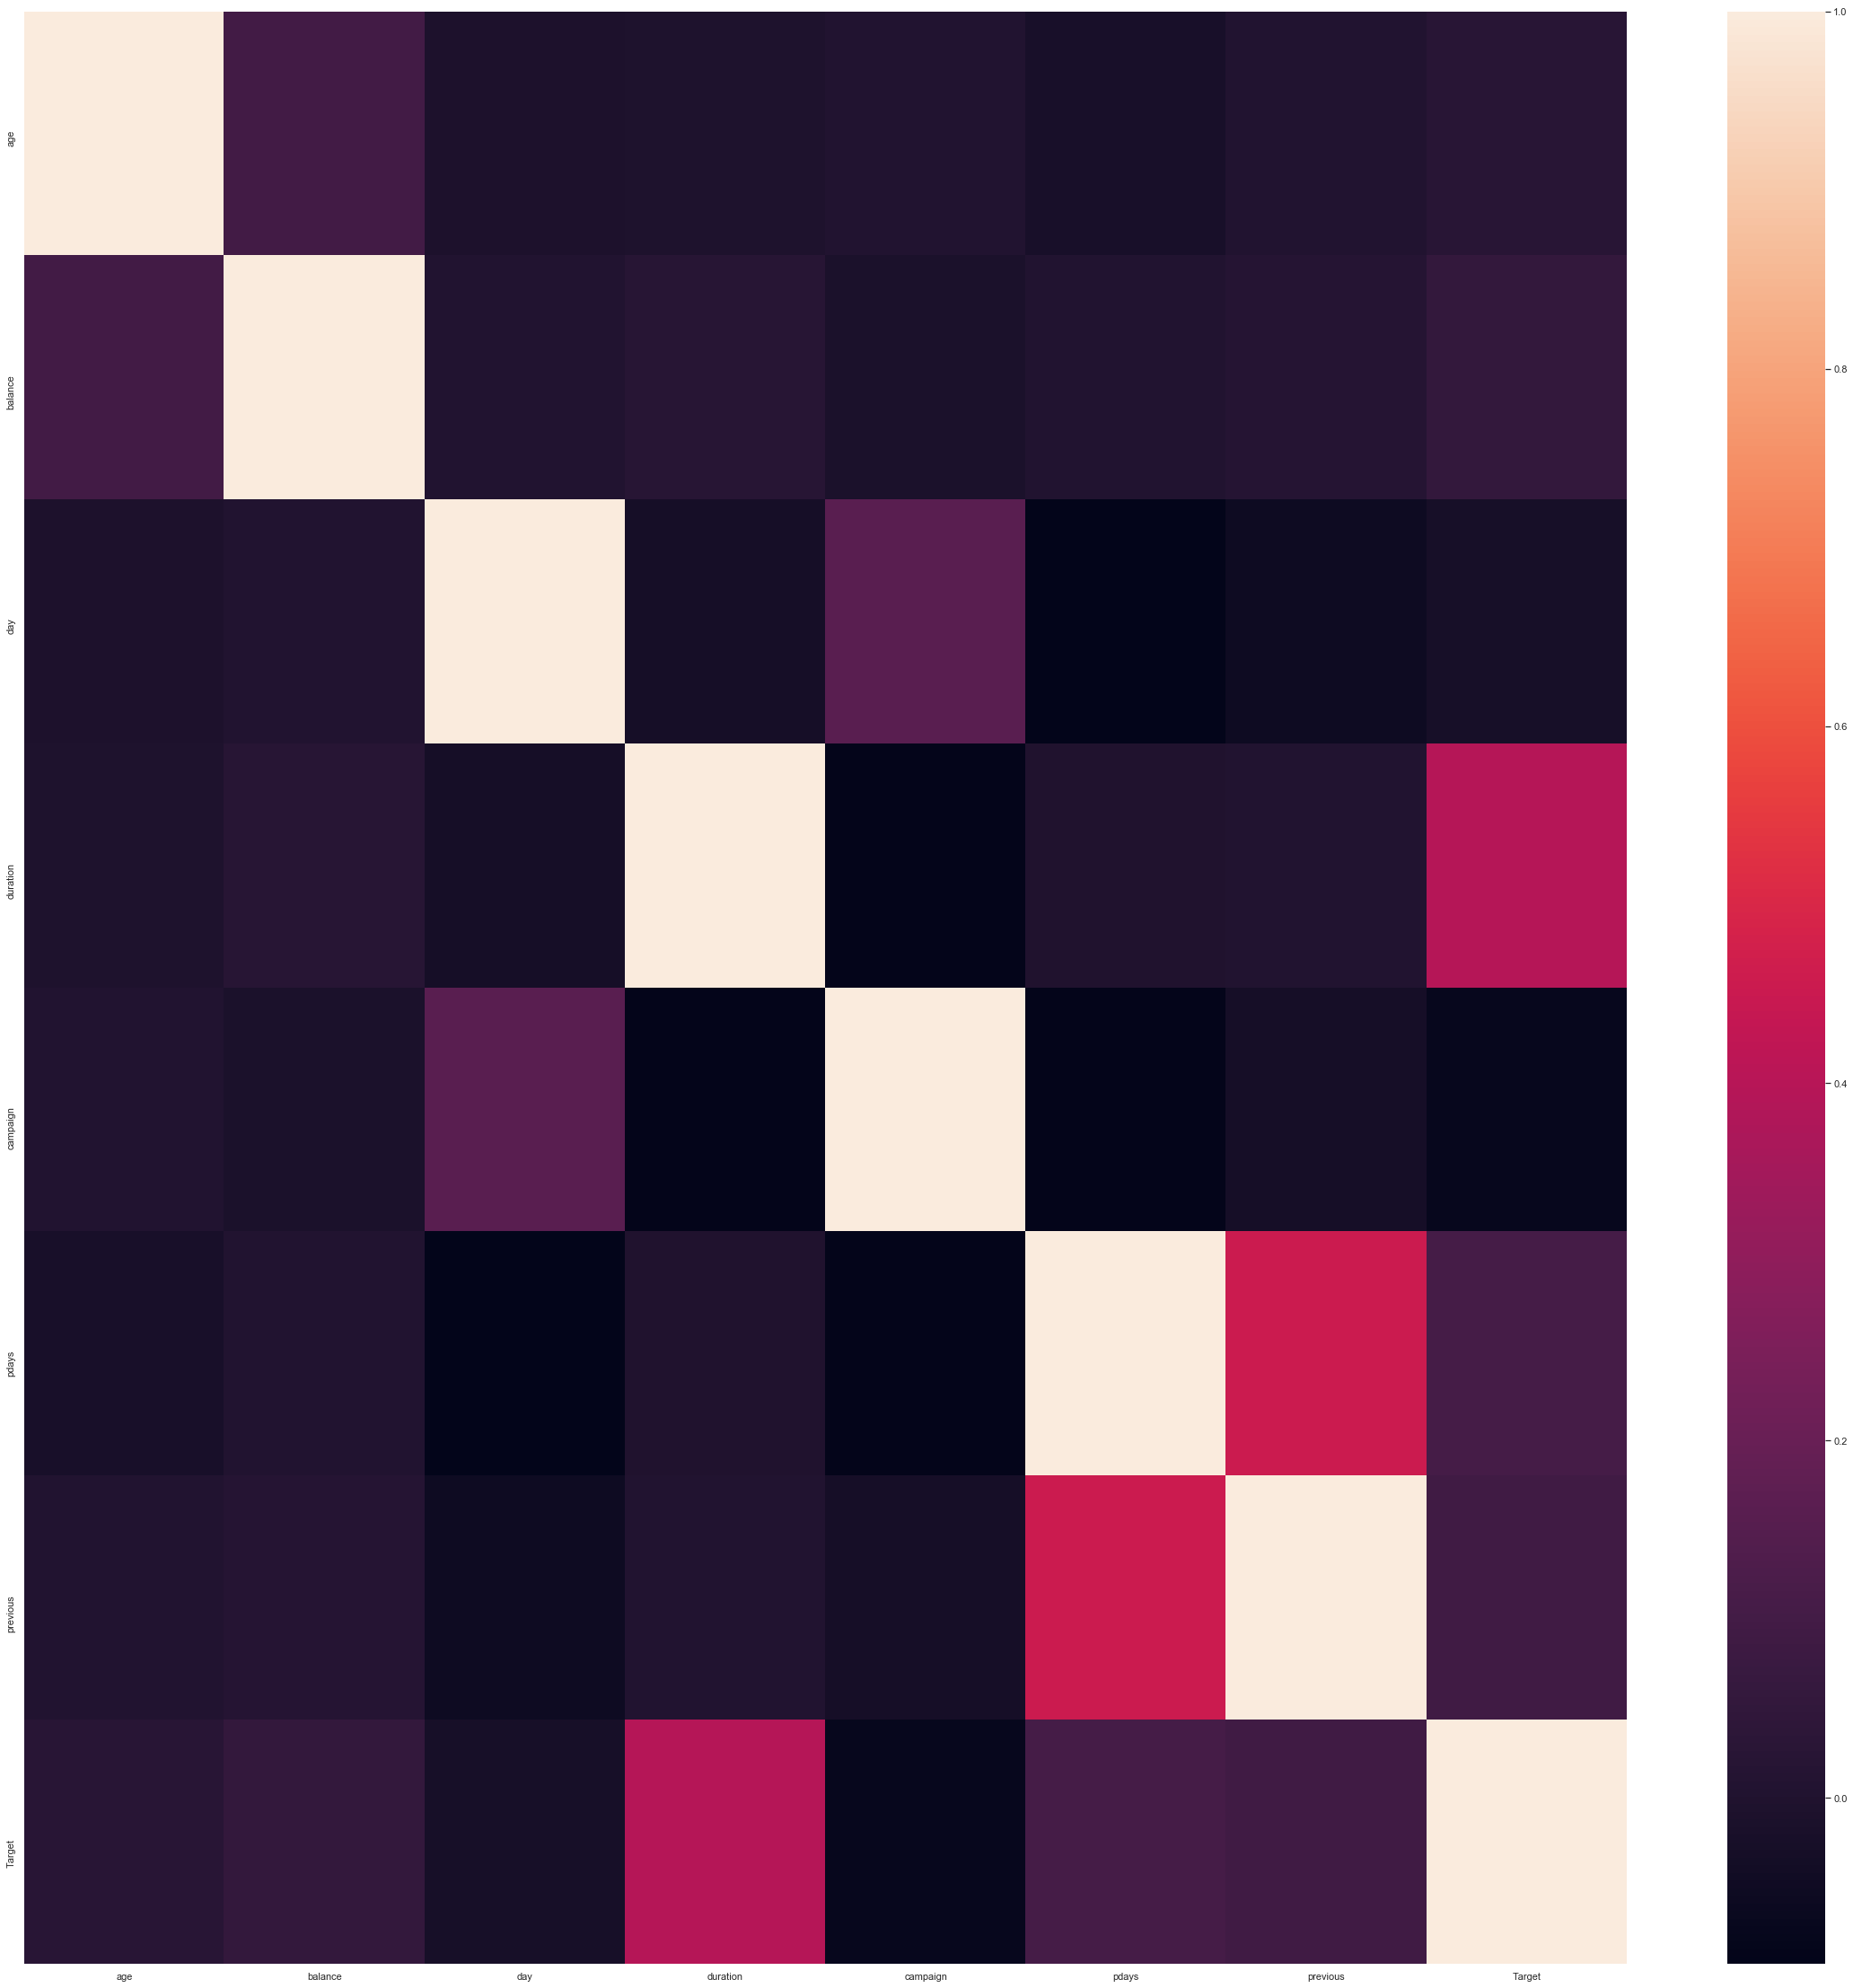

In [42]:
plt.figure(figsize=(40,40)) 
sns.heatmap(mydata.corr())

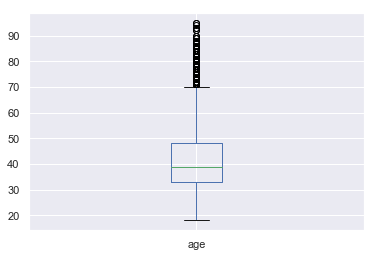

In [43]:
# Check outlier if any for Numberic column.
mydata.age.plot(kind='box')


In [44]:

print(mydata.age.max())
mydata[mydata['age'] > 90].head(100)

95


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,0
33699,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,1
41663,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,0
41934,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,1
42727,92,retired,married,unknown,no,775,no,no,cellular,26,jan,164,4,96,3,success,1
44262,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,1
44420,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,1


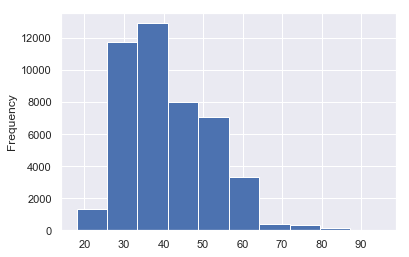

In [45]:
mydata.age.plot(kind='hist')

In [46]:
# Create Binning for all numeric fields base on Box plot quantile
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)

    

In [47]:
    binning(mydata,'age')

age
33.0 39.0 48.0


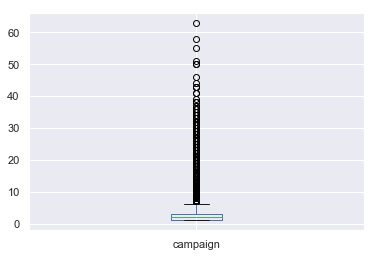

In [48]:
mydata.campaign.plot(kind='box')
# lot of exreme values.

In [49]:
print(mydata.campaign.max())
print(mydata.campaign.mean())
print(mydata.campaign.median())
print(mydata.campaign.unique())
print('Y=1 for campaign > 10' , mydata[(mydata['campaign'] > 10) & (mydata['Target'] ==1)].age.count())
print('Y=1 for campaign < 10' , mydata[(mydata['campaign'] <= 10) & (mydata['Target'] ==1)].age.count())
print('Y=1 for campaign = 1' , mydata[(mydata['campaign'] == 1) & (mydata['Target'] ==1)].age.count())

63
2.763840658246887
2.0
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Y=1 for campaign > 10 47
Y=1 for campaign < 10 5242
Y=1 for campaign = 1 2561


In [50]:
mydata.groupby(['campaign','Target']).Target.count()

campaign  Target
1         0         14983
          1          2561
2         0         11104
          1          1401
3         0          4903
          1           618
4         0          3205
          1           317
5         0          1625
          1           139
6         0          1199
          1            92
7         0           688
          1            47
8         0           508
          1            32
9         0           306
          1            21
10        0           252
          1            14
11        0           185
          1            16
12        0           151
          1             4
13        0           127
          1             6
14        0            89
          1             4
15        0            80
          1             4
                    ...  
22        0            23
23        0            22
24        0            19
          1             1
25        0            22
26        0            13
27        0          

In [51]:
q1 = mydata['campaign'].quantile(0.25)
q2 = mydata['campaign'].quantile(0.50)
q3 = mydata['campaign'].quantile(0.75)

print(q1)
print(q2)
print(q3)

iqr = q3-q1 #Interquartile range

extreme_low_campaign = q1-1.5*iqr
extreme_high_capmaign = q3+1.5*iqr

print (extreme_low_campaign)
print (extreme_high_capmaign)

1.0
2.0
3.0
-2.0
6.0


In [52]:
binning(mydata,'campaign')

campaign
1.0 2.0 3.0


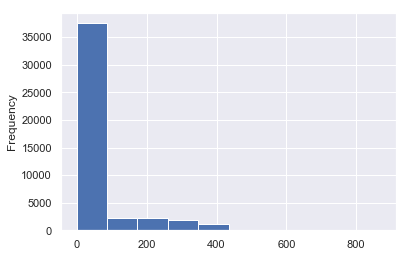

In [53]:
# pdays - number of days that passed by after the client was last contacted from a previous 
#campaign (numeric; 999 means client was not previously contacted)
# exclude Pdays = 999
mydata[mydata['pdays'] != 999].pdays.plot(kind='hist')

#since there is no pdays with 999 all are contacted before. but there are -1 value so considering the misus value catagorizing them as 0


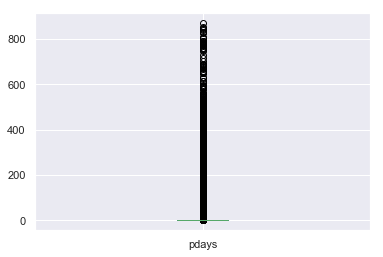

In [54]:
mydata[mydata['pdays'] != 999].pdays.plot(kind='box')

#sems Box plot is not applicable here

In [55]:
mydata.pdays.unique()


array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [56]:
#catogarizing the pdays.
mydata.loc[(mydata['pdays'] < 0), 'pdays'] = 0
mydata.loc[(mydata['pdays'] >= 0) & (mydata['pdays'] <= 200), 'pdays'] = 1
mydata.loc[(mydata['pdays'] >= 201) & (mydata['pdays'] <= 400), 'pdays'] = 2
mydata.loc[(mydata['pdays'] >= 401) & (mydata['pdays'] <= 600), 'pdays'] = 3
mydata.loc[(mydata['pdays'] >= 601) & (mydata['pdays'] <= 900) , 'pdays'] = 4 



In [57]:
mydata.pdays.unique()

array([1, 2, 3, 4], dtype=int64)

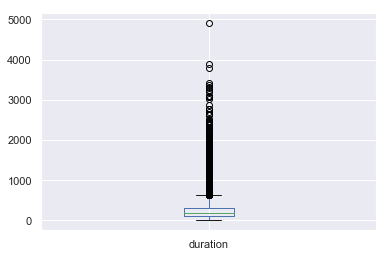

In [58]:
#box plot cannot be applicable here also
mydata.duration.plot(kind='box')

In [59]:
mydata.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [60]:
mydata[mydata['duration'] > 3000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
2386,3,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,1,0,unknown,0
4382,2,blue-collar,married,primary,no,183,yes,no,unknown,19,may,3078,4,1,0,unknown,0
6451,3,services,divorced,secondary,no,51,yes,yes,unknown,27,may,3094,2,1,0,unknown,1
9947,4,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,1,0,unknown,1
12347,1,admin.,single,secondary,no,-7,no,yes,unknown,26,jun,3183,2,1,0,unknown,1
19639,2,blue-collar,married,tertiary,no,359,no,yes,cellular,7,aug,3422,2,1,0,unknown,0
21113,3,self-employed,married,tertiary,no,423,no,no,cellular,14,aug,3322,2,1,0,unknown,0
24044,2,self-employed,single,tertiary,no,-103,yes,yes,telephone,17,oct,3253,1,1,0,unknown,1
24095,1,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,1,0,unknown,0
24148,4,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,1,0,unknown,0


In [61]:
#Define X and y
X = mydata.drop(['Target','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = mydata['Target']

In [62]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [63]:
X

,age,balance,duration,campaign,pdays,previous,default_no,default_yes
0,4,2143,261,1,1,0,1,0
1,3,29,151,1,1,0,1,0
2,1,2,76,1,1,0,1,0
3,3,1506,92,1,1,0,1,0
4,1,1,198,1,1,0,1,0
5,2,231,139,1,1,0,1,0
6,1,447,217,1,1,0,1,0
7,3,2,380,1,1,0,0,1
8,4,121,50,1,1,0,1,0
9,3,593,55,1,1,0,1,0


AttributeError: 'DataFrame' object has no attribute 'column'

In [65]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop([0], axis=1)
y = y.rename(columns= {1: 'Target'})


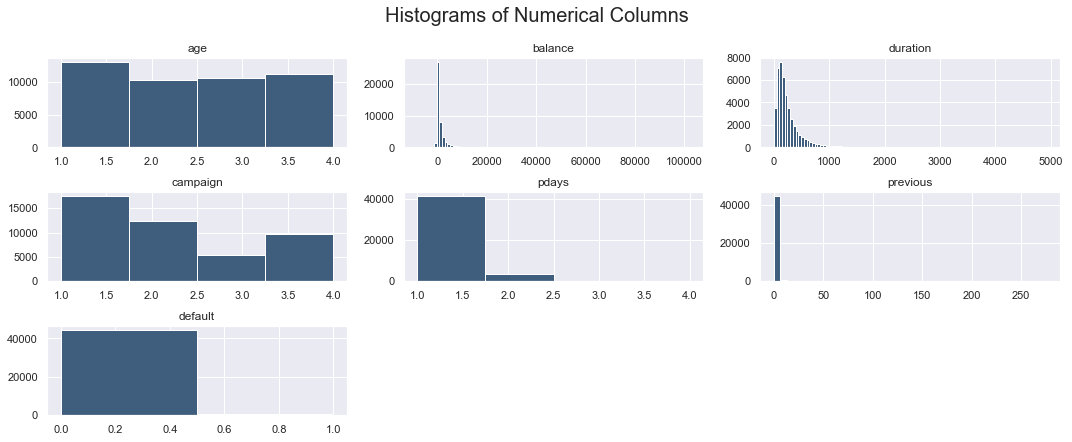

In [66]:
df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

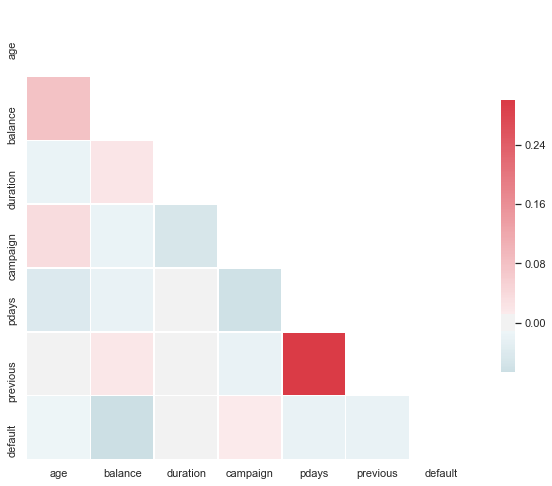

In [67]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [68]:
mydata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,4,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,1,0,unknown,0
1,3,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,1,0,unknown,0
2,1,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,1,0,unknown,0
3,3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,1,0,unknown,0
4,1,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,0,unknown,0
5,2,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,1,0,unknown,0
6,1,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,1,0,unknown,0
7,3,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,1,0,unknown,0
8,4,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,1,0,unknown,0
9,3,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,1,0,unknown,0


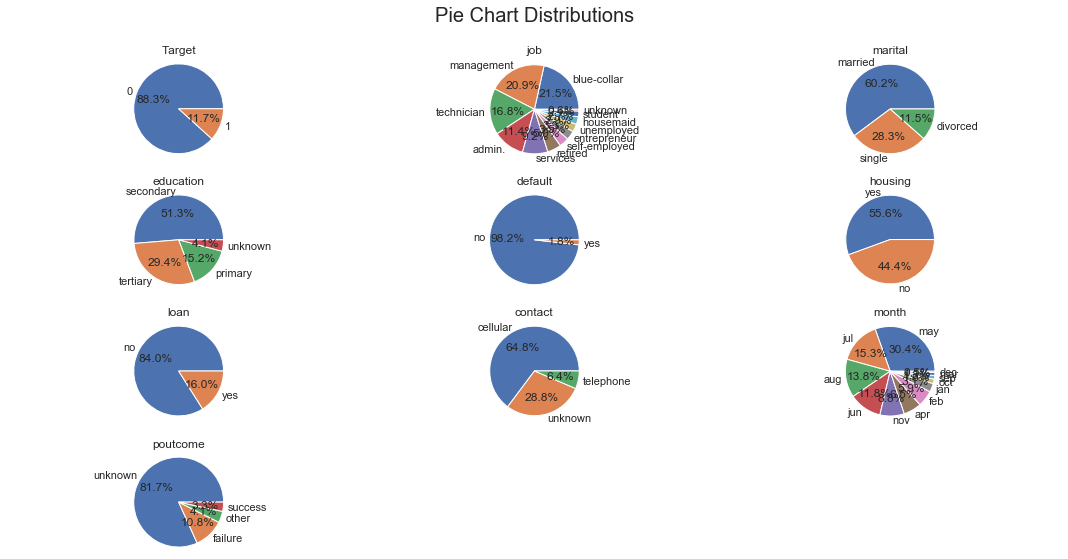

In [69]:
## Pie Plots
mydata.columns
df2 = mydata[['Target','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [70]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [71]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 7) (9043, 7) (36168, 1) (9043, 1)


In [72]:
y_train['Target'].value_counts()

0    31937
1     4231
Name: Target, dtype: int64

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [75]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [76]:
## K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [77]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [78]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [80]:
## Random Forest Gini (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [81]:
## Random Forest Gini (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [82]:
## Random Forest Gini (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'gini')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Gini (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [83]:
## Random Forest Entropy (n=100)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [84]:
## Random Forest Entropy (n=200)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 200,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [85]:
## Random Forest Entropy (n=300)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 300,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Entropy (n=300)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [86]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.887316,0.560748,0.170132,0.261059
1,K-Nearest Neighbors (minkowski),0.884662,0.515528,0.235350,0.323167
2,K-Nearest Neighbors (minkowski),0.884662,0.515528,0.235350,0.323167
3,SVM (Linear),0.883003,0.000000,0.000000,0.000000
4,Naive Bayes (Gaussian),0.867964,0.415633,0.316635,0.359442
5,Decision Tree,0.840208,0.324251,0.337429,0.330709
6,Random Forest Gini (n=100),0.876590,0.454259,0.272212,0.340426
7,Random Forest Gini (n=200),0.877474,0.461059,0.279773,0.348235
8,Random Forest Gini (n=300),0.876921,0.457364,0.278828,0.346447
9,Random Forest Entropy (n=100),0.875705,0.448437,0.271267,0.338045


In [89]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_proba = classifier.predict_proba(X=X_test)
import matplotlib.pyplot as plt
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

      0         1
0   0.0  0.953333
1   0.0  0.940000
2   1.0  0.936667
3   0.0  0.933333
4   1.0  0.913333
5   1.0  0.910000
6   1.0  0.903333
7   1.0  0.900000
8   0.0  0.896667
9   1.0  0.893333
10  1.0  0.890000
11  1.0  0.890000
12  0.0  0.886667
13  0.0  0.883333
14  1.0  0.883333
15  0.0  0.880000
16  1.0  0.876667
17  0.0  0.873333
18  1.0  0.873333
19  0.0  0.873333


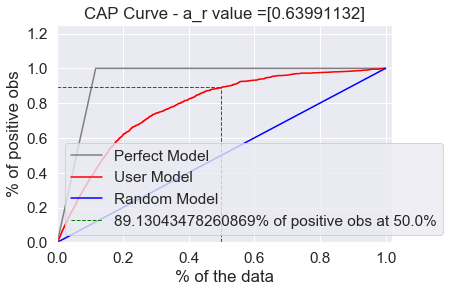

In [90]:
capcurve(y_test,y_pred_proba[:,1])

Test Data Accuracy: 0.8757


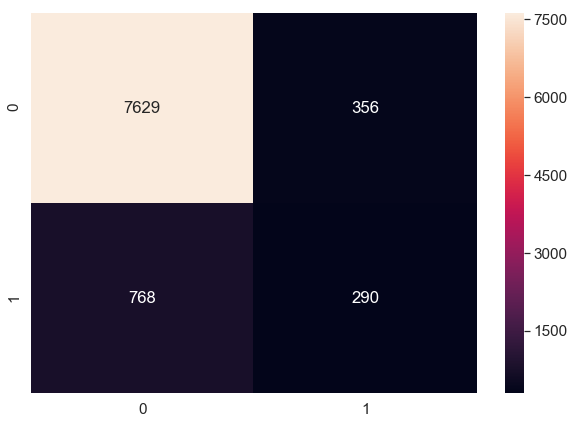

In [88]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [98]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
     from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
     classifier.fit(X_train,y_train) 
     print(classifier.score(X_test,y_test)) 
     print(confusion_matrix(y_test,classifier.predict(X_test)))
     print(accuracy_score(y_test,classifier.predict(X_test)))
     print(precision_score(y_test,classifier.predict(X_test)))
     print(recall_score(y_test,classifier.predict(X_test)))
     f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
     print("f1 score", f1)
     return classifier

In [99]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [100]:
# inport Dummy Classifier for creating Base Model
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.887316156142873
[[7844  141]
 [ 878  180]]
0.887316156142873
0.5607476635514018
0.17013232514177692
f1 score 0.26105873821609865


AUC: 0.825


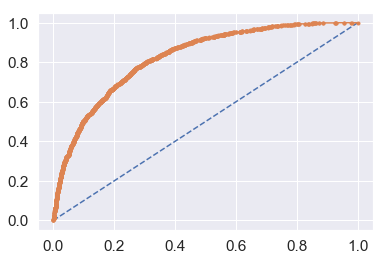

In [103]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,gb)

C:\Users\Tarun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8877584872276899
[[7739  246]
 [ 769  289]]
0.8877584872276899
0.5401869158878505
0.2731568998109641
f1 score 0.36283741368487127


AUC: 0.857


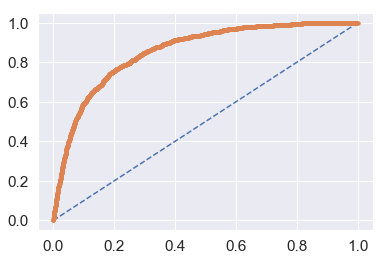

In [107]:

# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

Conclusion
GradientBoosting Classifier is the best classifier to target this proplem.